In [1]:
import pandas as pd
import numpy as np
import math as ms
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif,chi2,f_oneway,f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier,BaggingRegressor,BaggingClassifier,VotingRegressor,VotingClassifier,ExtraTreesRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,ComplementNB,MultinomialNB,BernoulliNB

/home/astro/.conda/envs/ds_env/lib/python3.11/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:18: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
df= pd.read_csv('Data/New_data.csv')

In [4]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [3]:
from sklearn.model_selection import train_test_split

In [5]:
X=df.drop('stroke',axis=1)

In [6]:
y=df['stroke']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [9]:
import matplotlib.pyplot as pltfrom
from sklearn.cluster import KMeans
from sklearn import metrics

In [10]:
wcss=[]
for i in range(2,11):
    kme=KMeans(n_clusters=i)
    kme.fit(X_train)
    wcss.append(kme.inertia_)



In [11]:
wcss

[4054025.3325591343,
 2800623.612531697,
 2044176.0946782813,
 1740181.099091784,
 1532494.7430684064,
 1298744.786685062,
 1187173.4143520475,
 1073776.0906726688,
 1015522.0947647357]

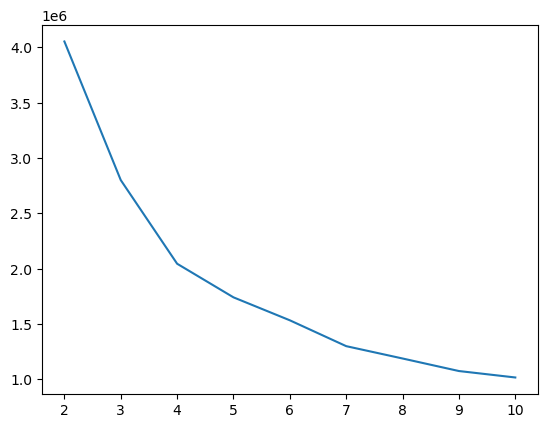

In [ ]:
plt.plot(range(2,wcss11),wcss)

In [13]:
kme=KMeans(n_clusters=2)


In [14]:
y_predect=kme.fit_predict(X_train)

In [38]:
accuracy_score(y_train,y_predect)

0.8378180039138943

In [16]:
from sklearn.metrics import silhouette_score


silhouette_score(X_train,y_predect)

0.6439370740455066

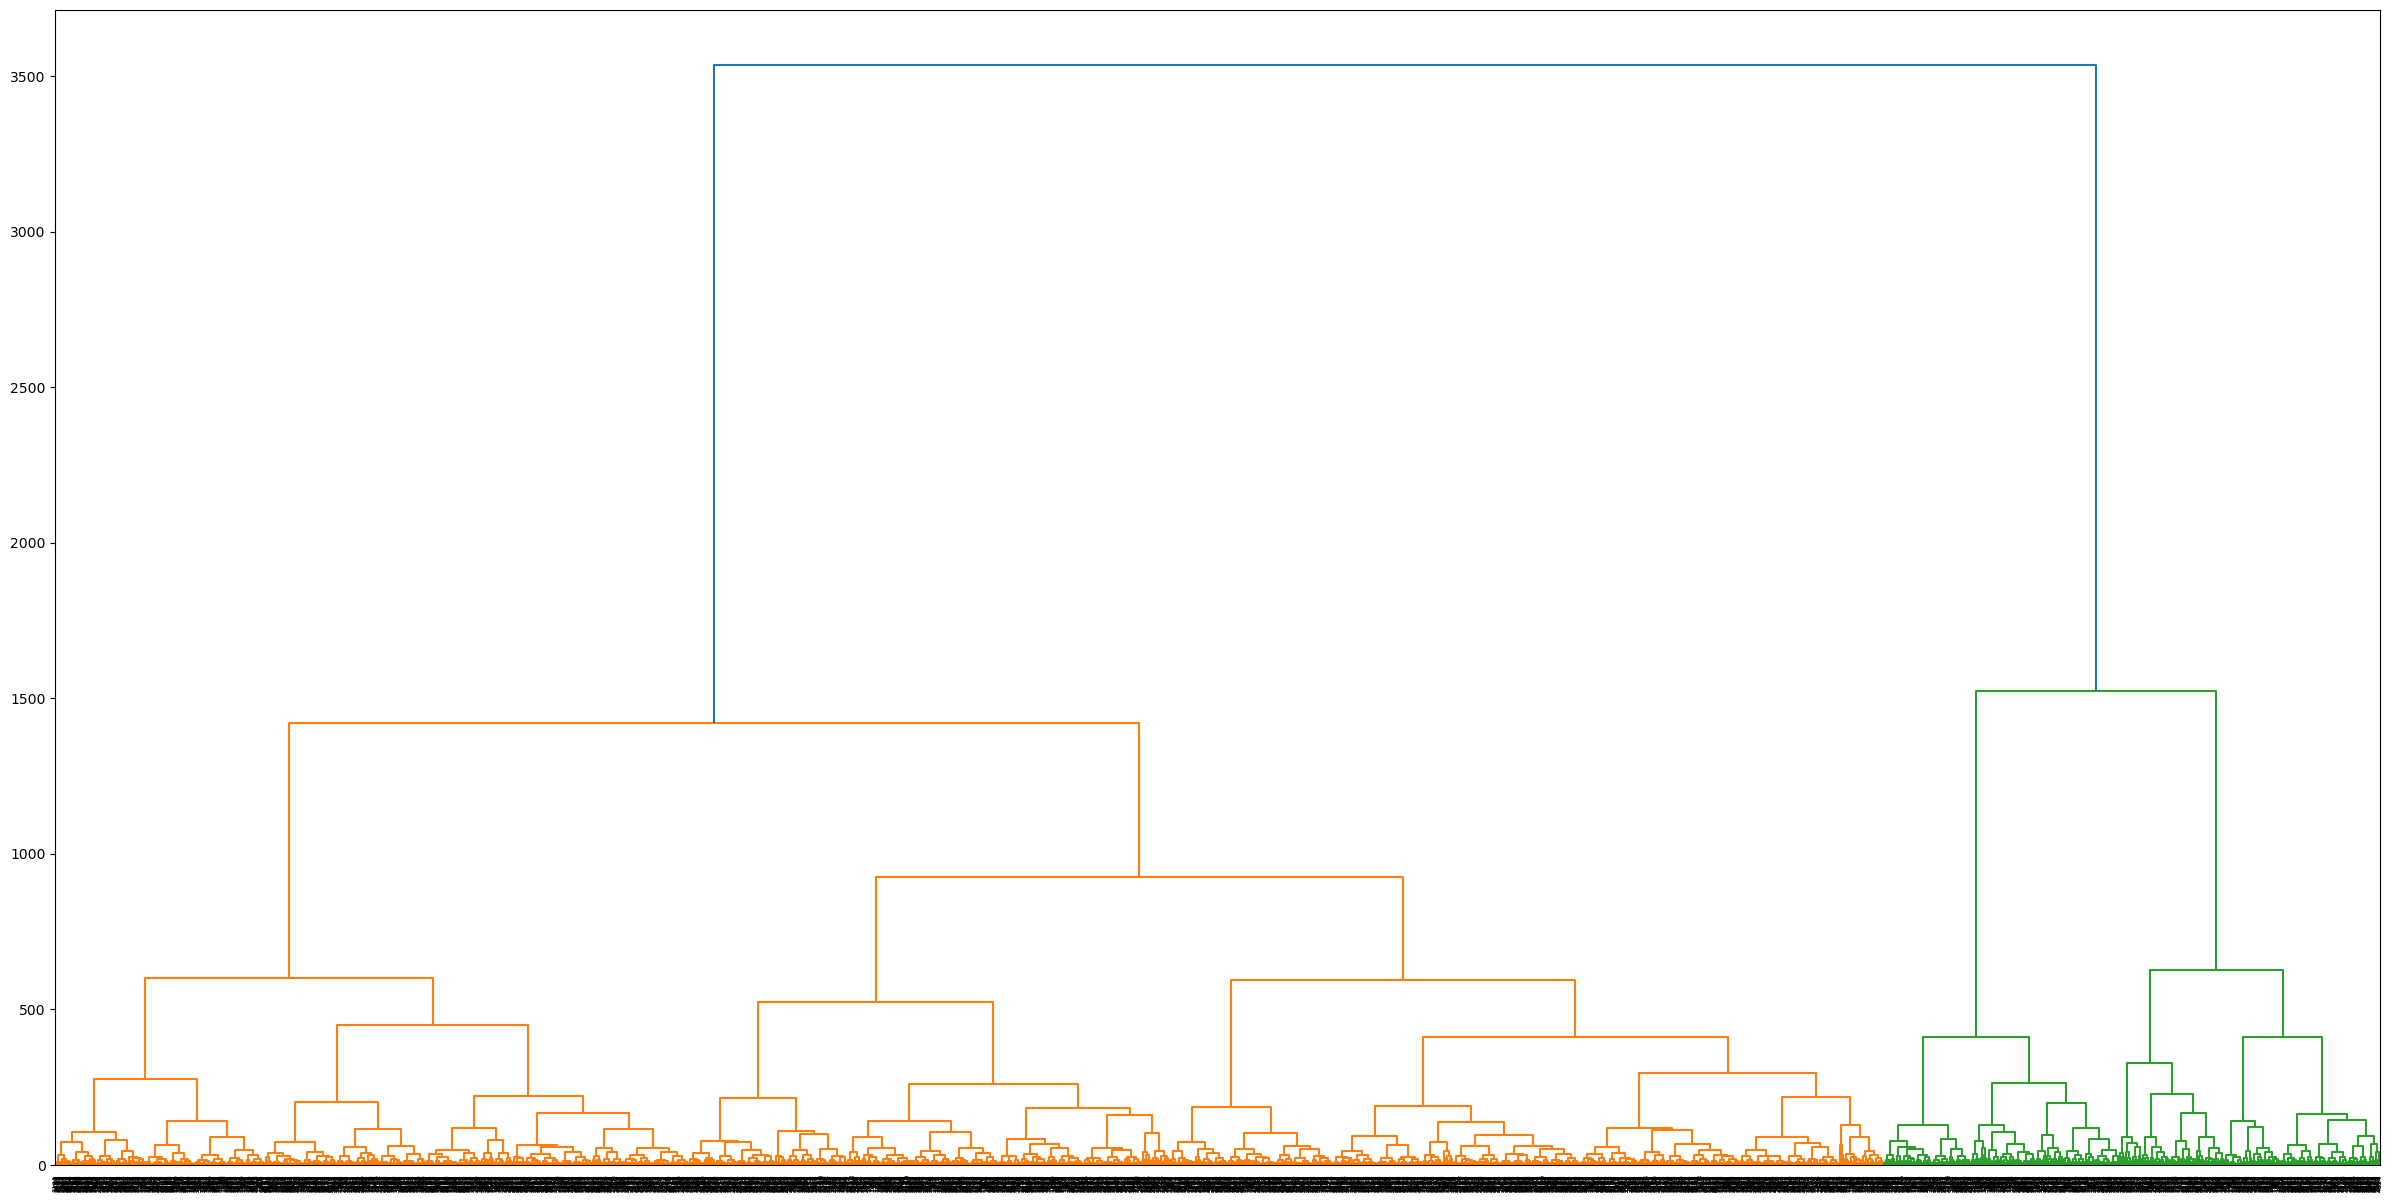

In [19]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(30,15))
den=sch.dendrogram(sch.linkage(X_train,method='ward'))
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

hc=AgglomerativeClustering(n_clusters=2,linkage='ward')
y_hc=hc.fit_predict(X_train)

In [21]:
y_hc

array([1, 1, 1, ..., 1, 0, 1], shape=(4088,))

In [27]:
accuracy_score(y_train,y_hc)

0.22211350293542073

In [36]:
from cProfile import label
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=10,min_samples=6)
labels=db.fit_predict(X)
labels

array([0, 0, 0, ..., 0, 0, 0], shape=(5110,))

In [37]:
accuracy_score(y,labels)

0.9410958904109589

In [3]:
import tensorflow